<h1 align="center"><strong>Tarea 01: Qué hora es?</strong></h1>

- Autor: [Renzo Guerrero Huayta](https://github.com/renzoguerrero17)
- Problemas extraídos del curso Fundamentos del procesamiento de imágenes de la Universidad Católica de Chile.

# Enunciado

El objetivo de esta tarea es realizar de manera individual un programa que determine automáticamente la hora que indica un reloj analógico. En esta carpeta se encuentran 6 fotografías del reloj, que deben ser leídas por un programa y procesadas para determinar automáticamente qué hora es, tal y como se muestra en este ejemplo para la primera imagen.

![](imagenes/ejemplo.jpg)


Una posible solución para este algoritmo sigue los siguientes pasos: i) encontrar el reloj en la imagen (es necesario segmentarlo del fondo y del marco), ii) realizar una corrección geométrica para que el reloj se vea como un círculo, iii) encontrar las dos manecillas principales (para la hora y los minutos), iv) estimar el ángulo de las manecillas; y v) calcular la hora indicando el número de la hora y los minutos.

La entrada del programa es la imagen, la salida es la hora en formato de dos números enteros (uno para la hora y otro para los minutos). No es necesario determinar el número de segundos.

IMPORTANTE: El algoritmo debe funcionar correctamente en las imágenes proporcionadas en la carpeta. No es necesario que funcione con otras imágenes o con otros relojes.

# Solución

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
os.chdir(r"C:\Users\titos\Github\Procesamiento Imagenes\Cap01_Introduccion\imagenes")

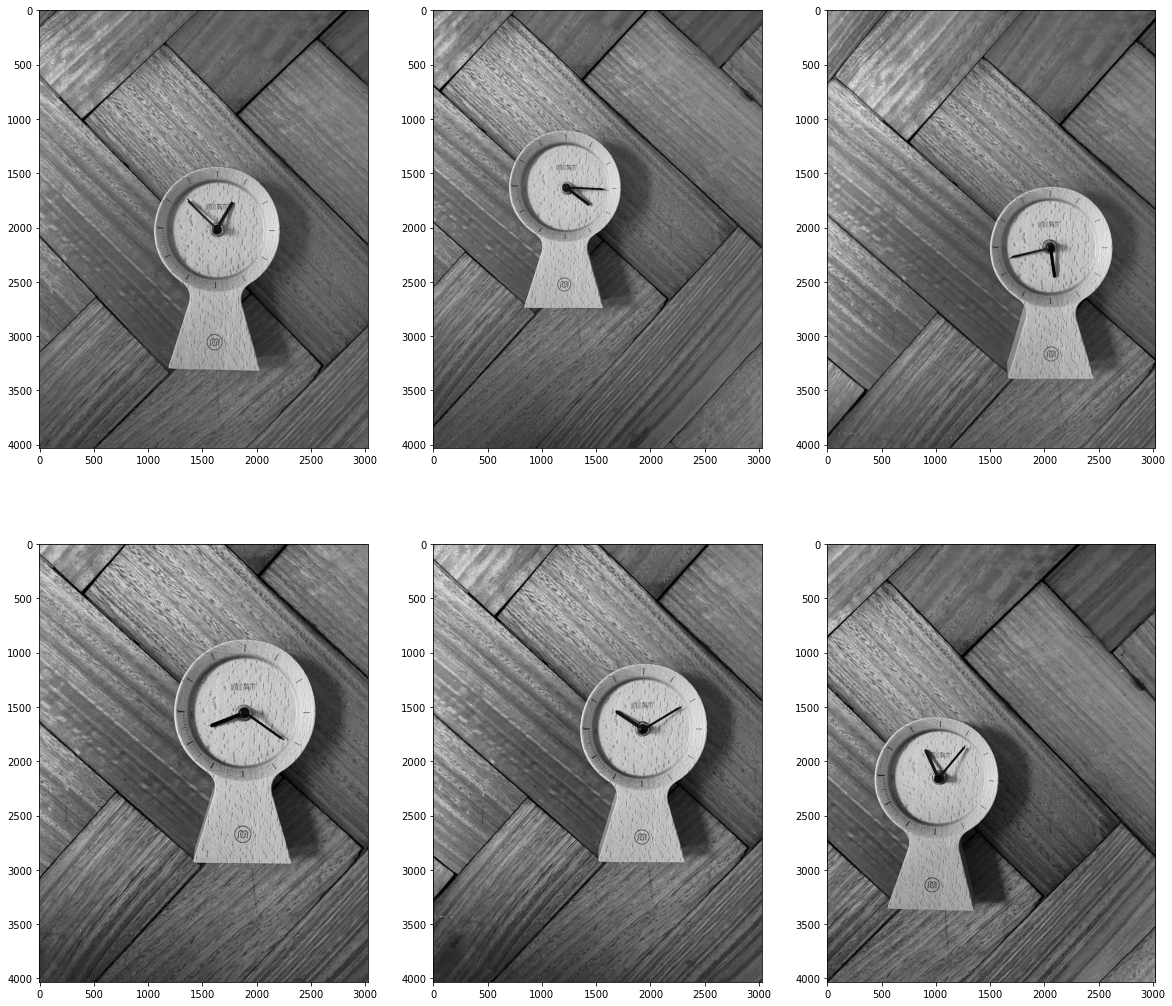

In [2]:
IMG_6490_xx = cv2.cvtColor(cv2.imread("./IMG_6490.jpg"),cv2.COLOR_BGR2RGB)
IMG_6490 = cv2.cvtColor(cv2.imread("./IMG_6490.jpg"),cv2.COLOR_BGR2GRAY)
IMG_6491 = cv2.cvtColor(cv2.imread("./IMG_6491.jpg"),cv2.COLOR_BGR2GRAY)
IMG_6492 = cv2.cvtColor(cv2.imread("./IMG_6492.jpg"),cv2.COLOR_BGR2GRAY)
IMG_6493 = cv2.cvtColor(cv2.imread("./IMG_6493.jpg"),cv2.COLOR_BGR2GRAY)
IMG_6494 = cv2.cvtColor(cv2.imread("./IMG_6494.jpg"),cv2.COLOR_BGR2GRAY)
IMG_6495 = cv2.cvtColor(cv2.imread("./IMG_6495.jpg"),cv2.COLOR_BGR2GRAY)

plt.figure(1,figsize=(20,18))
plt.subplot(2,3,1)
plt.imshow(IMG_6490,cmap='gray')
plt.subplot(2,3,2)
plt.imshow(IMG_6491,cmap='gray')
plt.subplot(2,3,3)
plt.imshow(IMG_6492,cmap='gray')
plt.subplot(2,3,4)
plt.imshow(IMG_6493,cmap='gray')
plt.subplot(2,3,5)
plt.imshow(IMG_6494,cmap='gray')
plt.subplot(2,3,6)
plt.imshow(IMG_6495,cmap='gray')
plt.show()

### Paso 1: Hallando el círculo del reloj

In [4]:
def create_mask(alto,ancho,radio):
    aux = np.zeros((alto,ancho))
    aux_alto = aux.shape[0] # y
    aux_ancho = aux.shape[1] # x
    cy = aux_alto // 2
    cx = aux_ancho // 2
    for i in range(aux_alto): # y
        for j in range(aux_ancho): # x
            if (i-cy)**2 + (j-cx)**2 < radio**2:
                aux[i][j] = 255
    
    plt.imshow(aux,cmap='gray')
    return aux

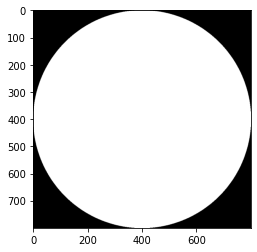

In [5]:
msk = create_mask(800,800,400)

In [6]:
def mean(image,umbral):
    alto = image.shape[0]
    ancho = image.shape[1]
    sumatoria = 0
    count = 0
    
    # Nos quedamos solo con los pixeles que pertenecen a la circunferencia
    for i in range(alto): # y
        for j in range(ancho): # x
            if image[i][j] != 0:
                sumatoria = sumatoria + image[i][j]
                count = count + 1
   
    # Sacamos la media de tono de gris de los pixeles
    media = sumatoria // count
    
    # Si la media es mayor a un umbral la region tiene el reloj en ella
    if media > umbral:
        return True  

In [7]:
def minimos(image,stride,umbral):
    alto = image.shape[0]
    ancho = image.shape[1]
    ordenada = []
    abcsisa  = []
    
    # Hallamos los mínimos valores en cada fila de la imagen
    for i in range(0,alto,stride): # y
        arg_min = np.argmin(image[i,:])
        if image[i,arg_min] < umbral:
            ordenada.append(i)
            abcsisa.append(arg_min)
    return ordenada,abcsisa

In [179]:
zz,yy = minimos(IMG_6490,500)
print(zz)
print(yy)

[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
[2840, 2299, 422, 860, 2863, 406, 158, 1041, 554]


In [124]:
for i,j in zip(zz,yy):
    print(i,j)

0 2840
500 2299
1000 422
1500 860
2000 2863
2500 406
3000 158
3500 1041
4000 554


In [28]:
def filtrado(image,dim,msk,stride,umbral):
    alto = image.shape[0]
    ancho = image.shape[1]
    out = np.zeros((alto,ancho))
    ordenadas,abcsisas = minimos(image,stride,umbral)
    for i in (ordenadas):
        for j in (abcsisas):
            if (i + dim < alto and j + dim < ancho):
                aux = image[i: i + dim,j: j + dim] * msk
                if mean(aux,100) == True:
                    out[i: i + dim,j: j + dim] = aux
    return out

In [29]:
reloj = filtrado(IMG_6490,800,msk,50,20)

KeyboardInterrupt: 

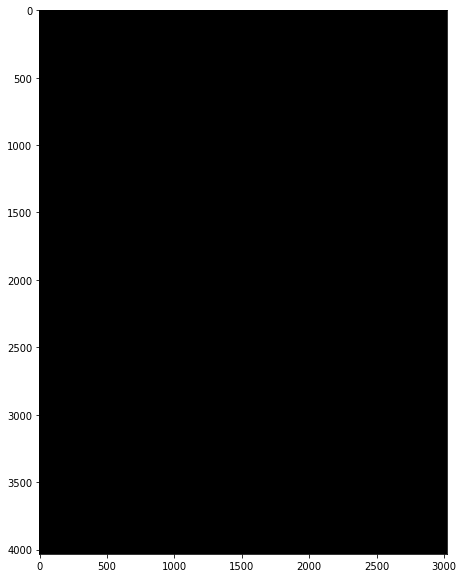

In [25]:
plt.figure(1,figsize=(10,10))
plt.imshow(reloj,cmap='gray')

In [73]:
alto = IMG_6490.shape[0]
ancho = IMG_6490.shape[1]
out = IMG_6490.copy()
for i in range(alto): # y
        for j in range(ancho): # x
            if (i + 1150 < alto and j + 1150 < ancho):
                out[i: i + 1150,j: j + 1150] = IMG_6490[i: i + 1150,j: j + 1150] * msk

KeyboardInterrupt: 

In [225]:
l = IMG_6490[100: 100 + 1150,100: 100 + 1150] * msk
print(l.shape)
plt.imshow(l,cmap='gray')

ValueError: operands could not be broadcast together with shapes (1150,1150) (800,800) 

In [226]:
out = IMG_6490_xx.copy()
count = 1
radious = 400
for i in range(IMG_6490.shape[0]): # filas --> componente y
    for j in range(IMG_6490.shape[1]): # columnas --> componente x
        if i > radious and j > radious and 5 < IMG_6490[i][j] < 15 and  10<np.mean(IMG_6490[i,j-20:j+20])<25 and np.mean(IMG_6490[:,j-radious:j+radious])>130 :
            (y,x) = (i ,j)
            print("Circulo {}".format(count))
            cv2.circle(out, (x,y) , radious, (255,0,0), 1)
            count +=1

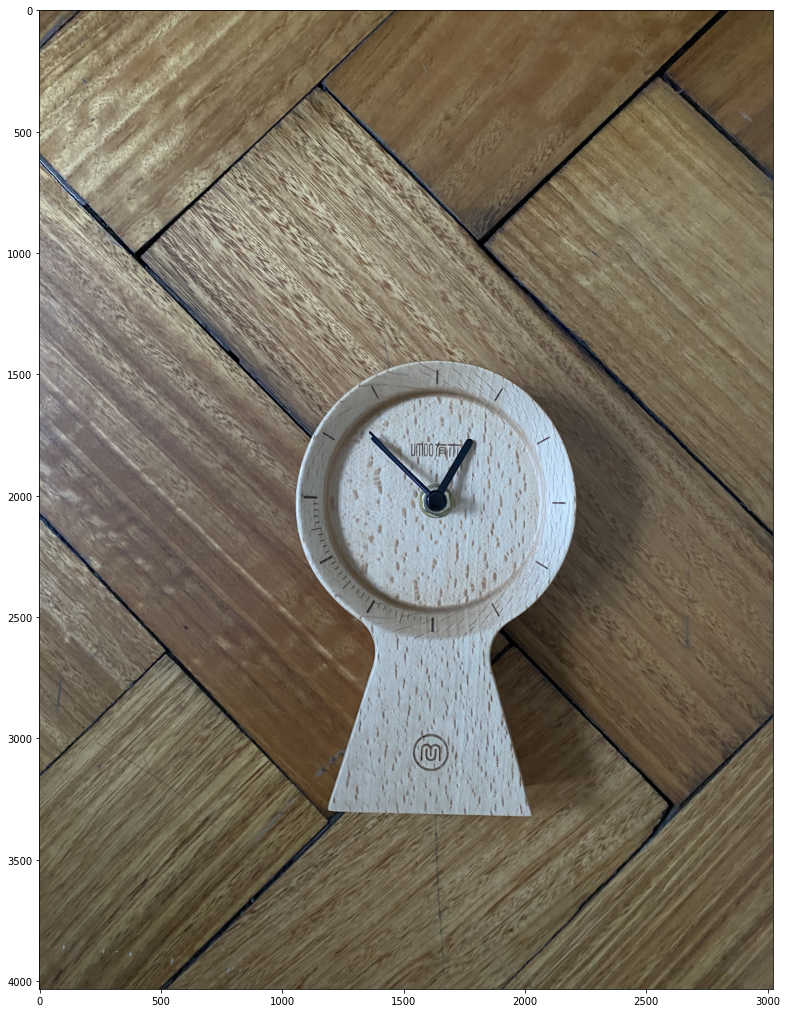

In [227]:
plt.figure(1,figsize=(20,18))

plt.imshow(out,cmap='gray')